<h1>STEP1 data preparation step<h1>

In [1]:
import pandas as pd

# Load the dataset from your file
data = pd.read_excel('data.xlsx', skiprows=3)

# Display the first few rows of the dataset
print(data.head())

   gender race/ethnicity parental level of education     lunch  \
0  female        group D                some college  standard   
1  female        group C           bachelor's degree  standard   
2  female        group D          associate's degree  standard   
3  female        group D          associate's degree  standard   
4    male        group D          associate's degree  standard   

  test preparation course  math score  reading score  writing score  
0               completed          59             70             78  
1               completed          57             69             77  
2               completed          65             71             74  
3               completed          67             71             76  
4               completed          99             85             88  


In [2]:
# Rename the columns for easier access
data.columns = ['Gender', 'Race_Ethnicity', 'Parental_Education', 'Lunch', 
                'Preparation_Course', 'Math_Score', 'Reading_Score', 'Writing_Score']

# Display the updated column names
print(data.columns)

Index(['Gender', 'Race_Ethnicity', 'Parental_Education', 'Lunch',
       'Preparation_Course', 'Math_Score', 'Reading_Score', 'Writing_Score'],
      dtype='object')


In [3]:
# Check for missing values
print(data.isnull().sum())

# Drop rows with missing values
data.dropna(inplace=True)

# Verify that there are no more missing values
print(data.isnull().sum())

Gender                0
Race_Ethnicity        0
Parental_Education    0
Lunch                 0
Preparation_Course    0
Math_Score            0
Reading_Score         0
Writing_Score         0
dtype: int64
Gender                0
Race_Ethnicity        0
Parental_Education    0
Lunch                 0
Preparation_Course    0
Math_Score            0
Reading_Score         0
Writing_Score         0
dtype: int64


In [4]:
# Remove duplicate rows
data.drop_duplicates(inplace=True)

# Check for duplicates
print(f"Number of duplicate rows: {data.duplicated().sum()}")

Number of duplicate rows: 0


<h1>STEP2 EDA<h1>

In [5]:
# Summary of numerical columns
print(data.describe())

# Summary of categorical columns
print(data.describe(include=['object']))

        Math_Score  Reading_Score  Writing_Score
count  1000.000000    1000.000000    1000.000000
mean     67.810000      70.382000      69.140000
std      15.250196      14.107413      15.025917
min      15.000000      25.000000      15.000000
25%      58.000000      61.000000      59.000000
50%      68.000000      70.500000      70.000000
75%      79.250000      80.000000      80.000000
max     100.000000     100.000000     100.000000
       Gender Race_Ethnicity Parental_Education     Lunch Preparation_Course
count    1000           1000               1000      1000               1000
unique      2              5                  6         2                  2
top      male        group C       some college  standard               none
freq      508            323                224       660                656


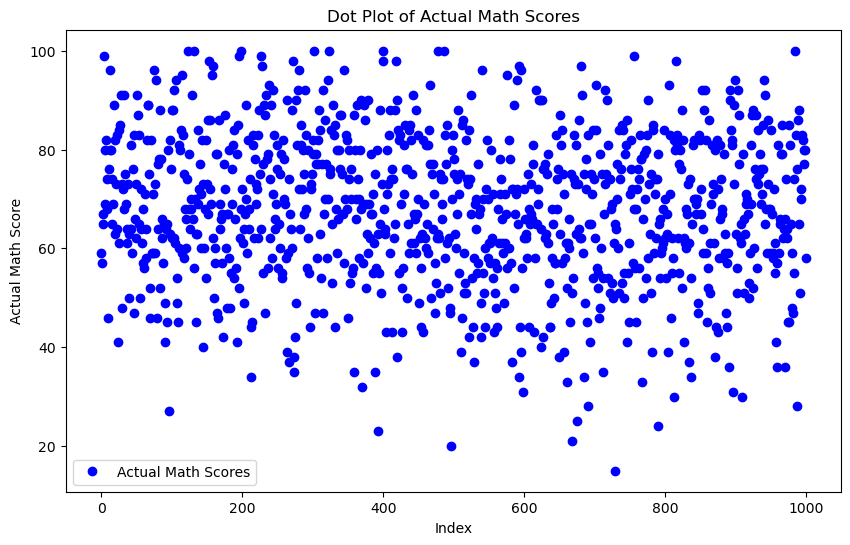

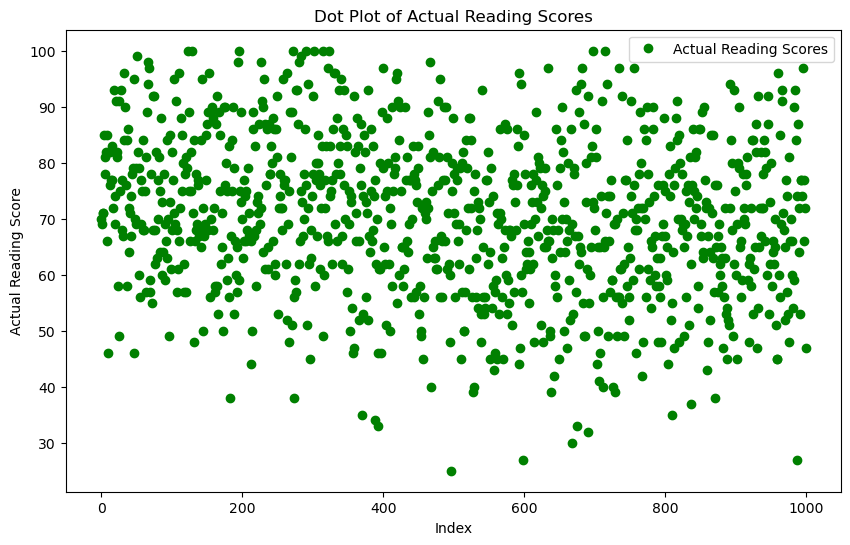

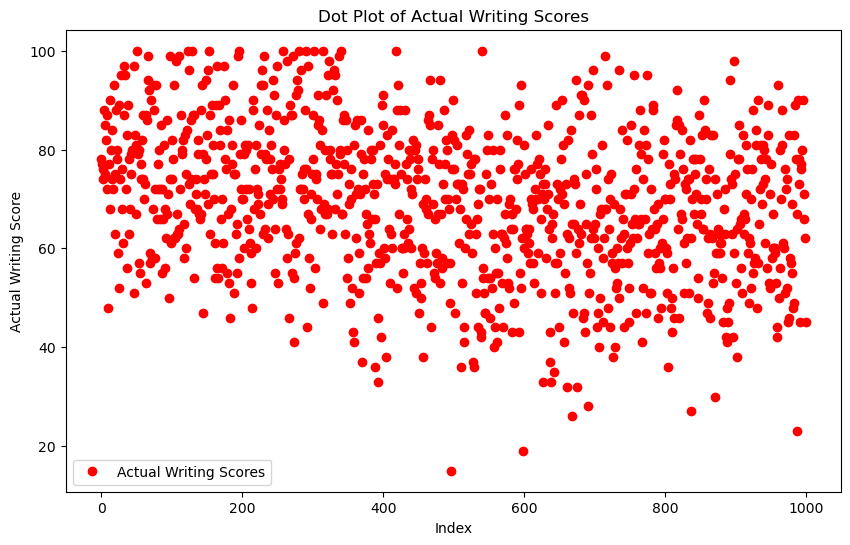

In [6]:
import matplotlib.pyplot as plt

# Assuming y_test_math, y_test_reading, and y_test_writing are loaded
y_test_math = data['Math_Score']  # Replace with appropriate variable if different
y_test_reading = data['Reading_Score']
y_test_writing = data['Writing_Score']

# Define a function for plotting dot plots
def plot_dot(scores, color, title, ylabel):
    plt.figure(figsize=(10, 6))
    plt.plot(scores, f'{color}o', label=f'Actual {title} Scores')  # Colored dots
    plt.xlabel('Index')
    plt.ylabel(ylabel)
    plt.title(f'Dot Plot of Actual {title} Scores')
    plt.legend()
    plt.show()

# Plot Math, Reading, and Writing Scores
plot_dot(y_test_math, 'b', 'Math', 'Actual Math Score')
plot_dot(y_test_reading, 'g', 'Reading', 'Actual Reading Score')
plot_dot(y_test_writing, 'r', 'Writing', 'Actual Writing Score')

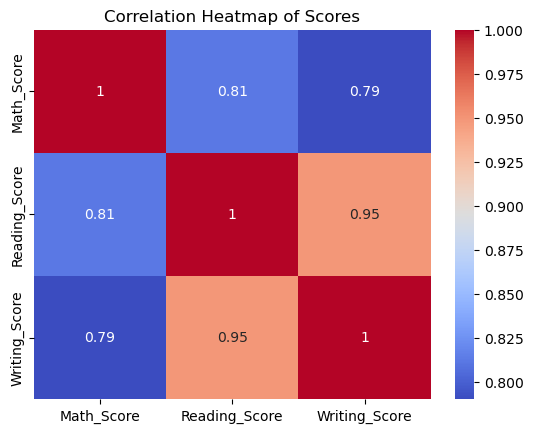

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
correlation_matrix = data[['Math_Score', 'Reading_Score', 'Writing_Score']].corr()

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Scores')
plt.show()

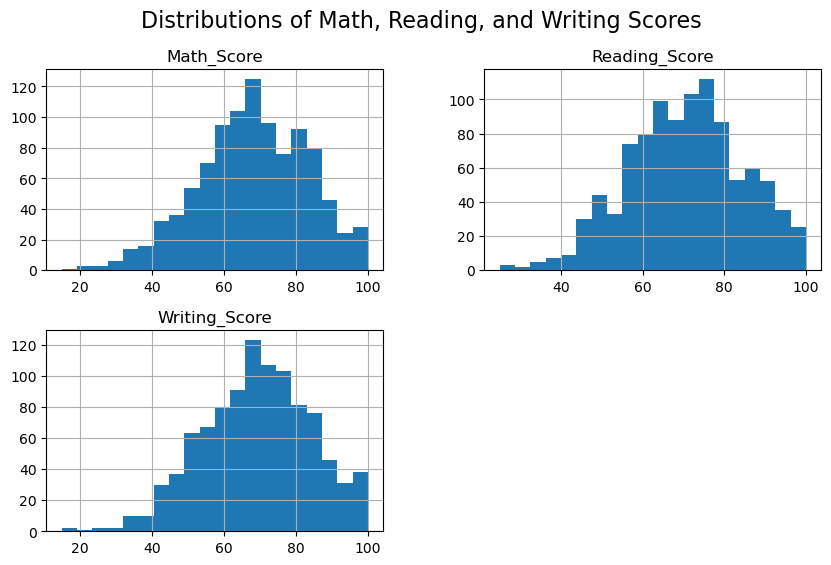

In [8]:
# Plot histograms for all subjects
data[['Math_Score', 'Reading_Score', 'Writing_Score']].hist(bins=20, figsize=(10, 6))
plt.suptitle('Distributions of Math, Reading, and Writing Scores', fontsize=16)
plt.show()

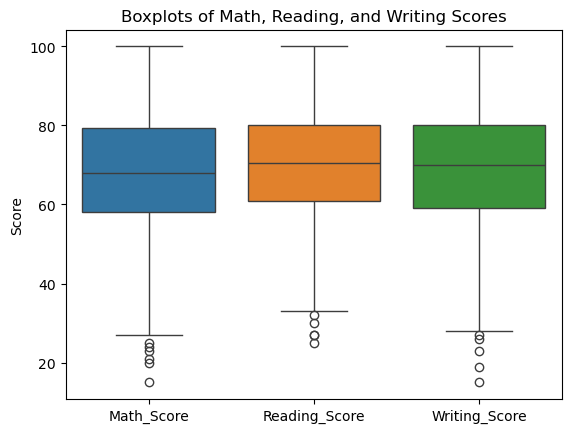

In [9]:
# Boxplots for all subjects
sns.boxplot(data=data[['Math_Score', 'Reading_Score', 'Writing_Score']])
plt.title('Boxplots of Math, Reading, and Writing Scores')
plt.ylabel('Score')
plt.show()

In [10]:
# Group scores by lunch type and calculate summary statistics
lunch_analysis = data.groupby('Lunch')[['Math_Score', 'Reading_Score', 'Writing_Score']].describe()

# Simplify the multi-index column names for better readability
lunch_analysis.columns = [f"{stat}_{score}" for score, stat in lunch_analysis.columns]

# Reset index for better formatting
lunch_analysis.reset_index(inplace=True)

# Format and print the output
print("Lunch-Based Summary Statistics:")
print("=" * 70)
for _, row in lunch_analysis.iterrows():
    print(f"Lunch Type: {row['Lunch']}")
    print("=" * 70)
    print(f"{'Statistic':<15} {'Math':<10} {'Reading':<10} {'Writing':<10}")
    print("-" * 70)
    print(f"{'Mean':<15} {row['mean_Math_Score']:<10.2f} {row['mean_Reading_Score']:<10.2f} {row['mean_Writing_Score']:<10.2f}")
    print(f"{'25% (Q1)':<15} {row['25%_Math_Score']:<10.2f} {row['25%_Reading_Score']:<10.2f} {row['25%_Writing_Score']:<10.2f}")
    print(f"{'50% (Median)':<15} {row['50%_Math_Score']:<10.2f} {row['50%_Reading_Score']:<10.2f} {row['50%_Writing_Score']:<10.2f}")
    print(f"{'75% (Q3)':<15} {row['75%_Math_Score']:<10.2f} {row['75%_Reading_Score']:<10.2f} {row['75%_Writing_Score']:<10.2f}")
    print(f"{'Min':<15} {row['min_Math_Score']:<10.2f} {row['min_Reading_Score']:<10.2f} {row['min_Writing_Score']:<10.2f}")
    print(f"{'Max':<15} {row['max_Math_Score']:<10.2f} {row['max_Reading_Score']:<10.2f} {row['max_Writing_Score']:<10.2f}")
    print(f"{'Std':<15} {row['std_Math_Score']:<10.2f} {row['std_Reading_Score']:<10.2f} {row['std_Writing_Score']:<10.2f}")
    print(f"{'Count':<15} {row['count_Math_Score']:<10.0f} {row['count_Reading_Score']:<10.0f} {row['count_Writing_Score']:<10.0f}")
    print("=" * 70)

Lunch-Based Summary Statistics:
Lunch Type: free/reduced
Statistic       Math       Reading    Writing   
----------------------------------------------------------------------
Mean            59.90      65.64      64.24     
25% (Q1)        50.00      57.00      54.00     
50% (Median)    61.00      66.00      64.00     
75% (Q3)        70.00      75.00      75.00     
Min             15.00      25.00      15.00     
Max             93.00      98.00      99.00     
Std             13.97      13.24      14.44     
Count           340        340        340       
Lunch Type: standard
Statistic       Math       Reading    Writing   
----------------------------------------------------------------------
Mean            71.88      72.82      71.67     
25% (Q1)        62.00      64.00      62.00     
50% (Median)    72.50      73.00      72.00     
75% (Q3)        82.00      83.00      81.00     
Min             21.00      27.00      19.00     
Max             100.00     100.00     100.00 

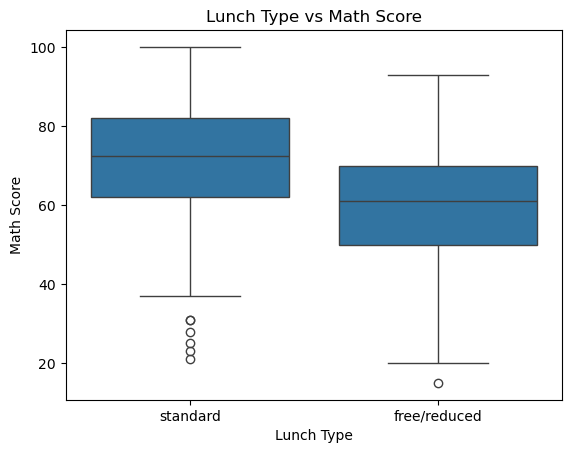

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot: Lunch type vs Math Score
sns.boxplot(x='Lunch', y='Math_Score', data=data)
plt.title('Lunch Type vs Math Score')
plt.xlabel('Lunch Type')
plt.ylabel('Math Score')
plt.show()

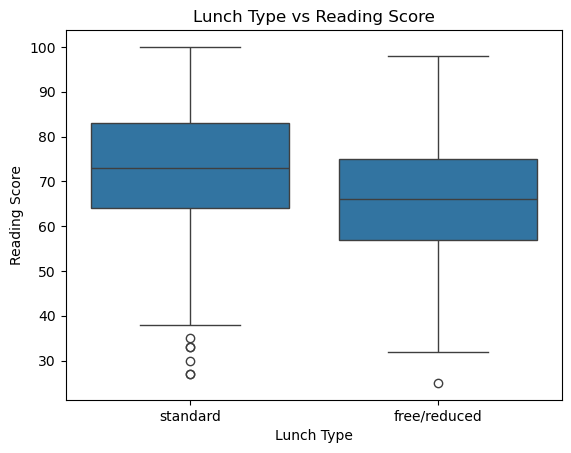

In [12]:
# Boxplot: Lunch type vs Reading Score
sns.boxplot(x='Lunch', y='Reading_Score', data=data)
plt.title('Lunch Type vs Reading Score')
plt.xlabel('Lunch Type')
plt.ylabel('Reading Score')
plt.show()

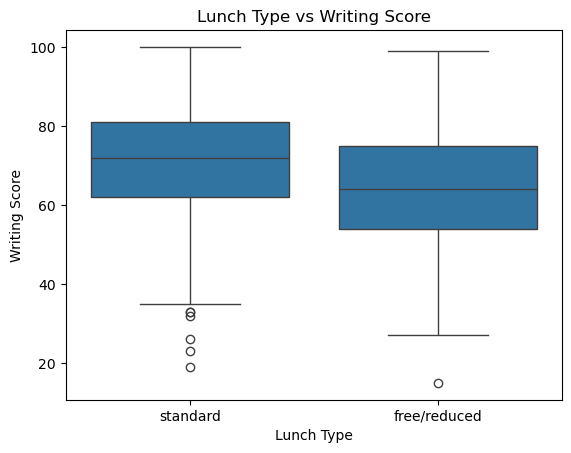

In [13]:
# Boxplot: Lunch type vs Writing Score
sns.boxplot(x='Lunch', y='Writing_Score', data=data)
plt.title('Lunch Type vs Writing Score')
plt.xlabel('Lunch Type')
plt.ylabel('Writing Score')
plt.show()

In [14]:
 # Calculate the mean scores grouped by lunch type
average_scores_by_lunch = data.groupby('Lunch')[['Math_Score', 'Reading_Score', 'Writing_Score']].mean()

# Display the average scores
print(average_scores_by_lunch)

              Math_Score  Reading_Score  Writing_Score
Lunch                                                 
free/reduced   59.900000      65.641176      64.235294
standard       71.884848      72.824242      71.666667


In [15]:
# Group scores by gender and calculate summary statistics
gender_analysis = data.groupby('Gender')[['Math_Score', 'Reading_Score', 'Writing_Score']].describe()

# Simplify multi-index column names for better readability
gender_analysis.columns = [f"{stat}_{score}" for score, stat in gender_analysis.columns]

# Reset index for cleaner formatting
gender_analysis.reset_index(inplace=True)

# Format and print the output
print("Gender-Based Summary Statistics:")
print("=" * 70)
for _, row in gender_analysis.iterrows():
    print(f"Gender: {row['Gender']}")
    print("=" * 70)
    print(f"{'Statistic':<15} {'Math':<10} {'Reading':<10} {'Writing':<10}")
    print("-" * 70)
    print(f"{'Mean':<15} {row['mean_Math_Score']:<10.2f} {row['mean_Reading_Score']:<10.2f} {row['mean_Writing_Score']:<10.2f}")
    print(f"{'25% (Q1)':<15} {row['25%_Math_Score']:<10.2f} {row['25%_Reading_Score']:<10.2f} {row['25%_Writing_Score']:<10.2f}")
    print(f"{'50% (Median)':<15} {row['50%_Math_Score']:<10.2f} {row['50%_Reading_Score']:<10.2f} {row['50%_Writing_Score']:<10.2f}")
    print(f"{'75% (Q3)':<15} {row['75%_Math_Score']:<10.2f} {row['75%_Reading_Score']:<10.2f} {row['75%_Writing_Score']:<10.2f}")
    print(f"{'Min':<15} {row['min_Math_Score']:<10.2f} {row['min_Reading_Score']:<10.2f} {row['min_Writing_Score']:<10.2f}")
    print(f"{'Max':<15} {row['max_Math_Score']:<10.2f} {row['max_Reading_Score']:<10.2f} {row['max_Writing_Score']:<10.2f}")
    print(f"{'Std':<15} {row['std_Math_Score']:<10.2f} {row['std_Reading_Score']:<10.2f} {row['std_Writing_Score']:<10.2f}")
    print(f"{'Count':<15} {row['count_Math_Score']:<10.0f} {row['count_Reading_Score']:<10.0f} {row['count_Writing_Score']:<10.0f}")
    print("=" * 70)

Gender-Based Summary Statistics:
Gender: female
Statistic       Math       Reading    Writing   
----------------------------------------------------------------------
Mean            64.77      73.47      73.44     
25% (Q1)        55.00      65.00      64.00     
50% (Median)    65.00      74.00      74.00     
75% (Q3)        75.00      84.00      84.00     
Min             15.00      30.00      26.00     
Max             98.00      100.00     100.00    
Std             15.08      14.09      14.57     
Count           492        492        492       
Gender: male
Statistic       Math       Reading    Writing   
----------------------------------------------------------------------
Mean            70.75      67.39      64.98     
25% (Q1)        60.00      58.00      55.00     
50% (Median)    72.00      67.00      65.50     
75% (Q3)        82.00      77.00      75.00     
Min             20.00      25.00      15.00     
Max             100.00     100.00     100.00    
Std          

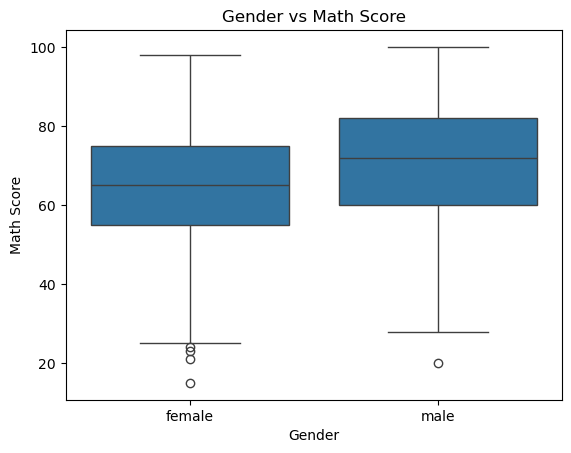

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot: Gender vs Math Score
sns.boxplot(x='Gender', y='Math_Score', data=data)
plt.title('Gender vs Math Score')
plt.xlabel('Gender')
plt.ylabel('Math Score')
plt.show()

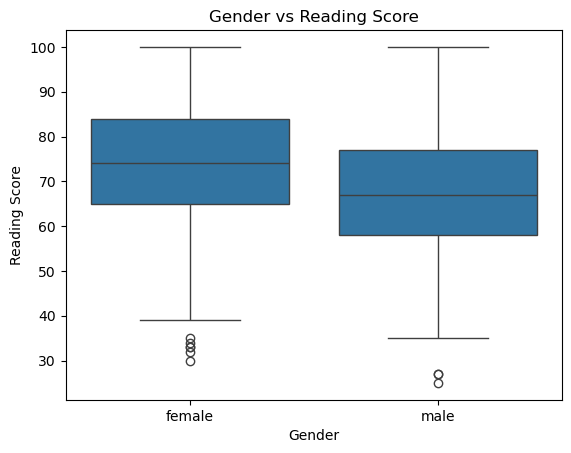

In [17]:
# Boxplot: Gender vs Reading Score
sns.boxplot(x='Gender', y='Reading_Score', data=data)
plt.title('Gender vs Reading Score')
plt.xlabel('Gender')
plt.ylabel('Reading Score')
plt.show()

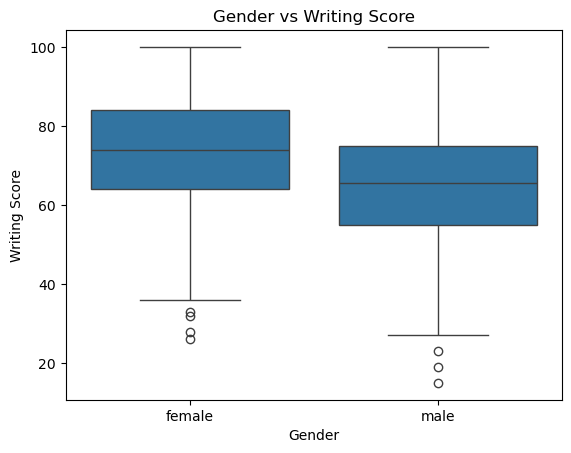

In [18]:
# Boxplot: Gender vs Writing Score
sns.boxplot(x='Gender', y='Writing_Score', data=data)
plt.title('Gender vs Writing Score')
plt.xlabel('Gender')
plt.ylabel('Writing Score')
plt.show()

In [19]:
# Calculate mean scores for each gender
mean_scores_by_gender = data.groupby('Gender')[['Math_Score', 'Reading_Score', 'Writing_Score']].mean()

# Display the results
print(mean_scores_by_gender)

        Math_Score  Reading_Score  Writing_Score
Gender                                          
female    64.77439      73.473577      73.439024
male      70.75000      67.387795      64.976378


In [20]:
# Group scores by test preparation course and calculate summary statistics
prep_analysis = data.groupby('Preparation_Course')[['Math_Score', 'Reading_Score', 'Writing_Score']].describe()

# Simplify multi-index column names for better readability
prep_analysis.columns = [f"{stat}_{score}" for score, stat in prep_analysis.columns]

# Reset index for better formatting
prep_analysis.reset_index(inplace=True)

# Format and print the output
print("Preparation-Based Summary Statistics:")
print("=" * 70)
for _, row in prep_analysis.iterrows():
    print(f"Preparation Course: {row['Preparation_Course']}")
    print("=" * 70)
    print(f"{'Statistic':<15} {'Math':<10} {'Reading':<10} {'Writing':<10}")
    print("-" * 70)
    print(f"{'Mean':<15} {row['mean_Math_Score']:<10.2f} {row['mean_Reading_Score']:<10.2f} {row['mean_Writing_Score']:<10.2f}")
    print(f"{'25% (Q1)':<15} {row['25%_Math_Score']:<10.2f} {row['25%_Reading_Score']:<10.2f} {row['25%_Writing_Score']:<10.2f}")
    print(f"{'50% (Median)':<15} {row['50%_Math_Score']:<10.2f} {row['50%_Reading_Score']:<10.2f} {row['50%_Writing_Score']:<10.2f}")
    print(f"{'75% (Q3)':<15} {row['75%_Math_Score']:<10.2f} {row['75%_Reading_Score']:<10.2f} {row['75%_Writing_Score']:<10.2f}")
    print(f"{'Min':<15} {row['min_Math_Score']:<10.2f} {row['min_Reading_Score']:<10.2f} {row['min_Writing_Score']:<10.2f}")
    print(f"{'Max':<15} {row['max_Math_Score']:<10.2f} {row['max_Reading_Score']:<10.2f} {row['max_Writing_Score']:<10.2f}")
    print(f"{'Std':<15} {row['std_Math_Score']:<10.2f} {row['std_Reading_Score']:<10.2f} {row['std_Writing_Score']:<10.2f}")
    print(f"{'Count':<15} {row['count_Math_Score']:<10.0f} {row['count_Reading_Score']:<10.0f} {row['count_Writing_Score']:<10.0f}")
    print("=" * 70)

Preparation-Based Summary Statistics:
Preparation Course: completed
Statistic       Math       Reading    Writing   
----------------------------------------------------------------------
Mean            70.33      74.73      75.81     
25% (Q1)        60.75      66.00      67.00     
50% (Median)    70.00      75.00      75.00     
75% (Q3)        81.00      84.00      86.00     
Min             27.00      38.00      41.00     
Max             100.00     100.00     100.00    
Std             14.69      13.07      13.43     
Count           344        344        344       
Preparation Course: none
Statistic       Math       Reading    Writing   
----------------------------------------------------------------------
Mean            66.49      68.10      65.64     
25% (Q1)        57.00      58.00      56.00     
50% (Median)    67.00      68.50      66.00     
75% (Q3)        78.00      78.00      76.00     
Min             15.00      25.00      15.00     
Max             100.00     100

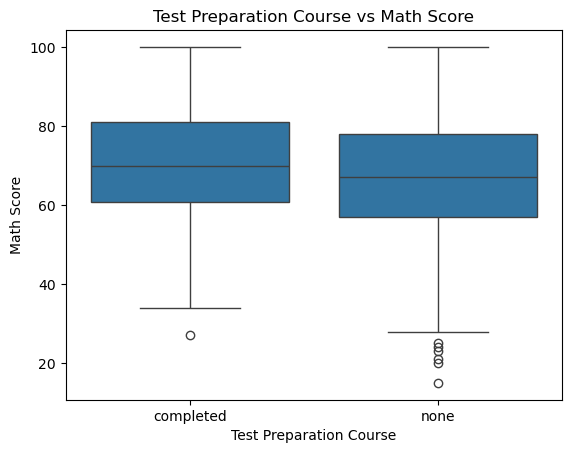

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot: Test Preparation Course vs Math Score
sns.boxplot(x='Preparation_Course', y='Math_Score', data=data)
plt.title('Test Preparation Course vs Math Score')
plt.xlabel('Test Preparation Course')
plt.ylabel('Math Score')
plt.show()

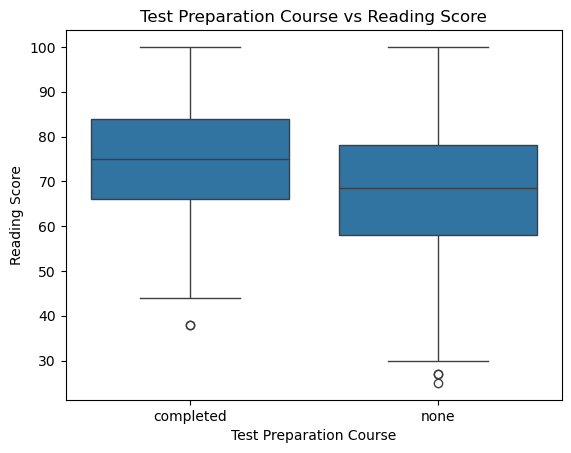

In [22]:
# Boxplot: Test Preparation Course vs Reading Score
sns.boxplot(x='Preparation_Course', y='Reading_Score', data=data)
plt.title('Test Preparation Course vs Reading Score')
plt.xlabel('Test Preparation Course')
plt.ylabel('Reading Score')
plt.show()

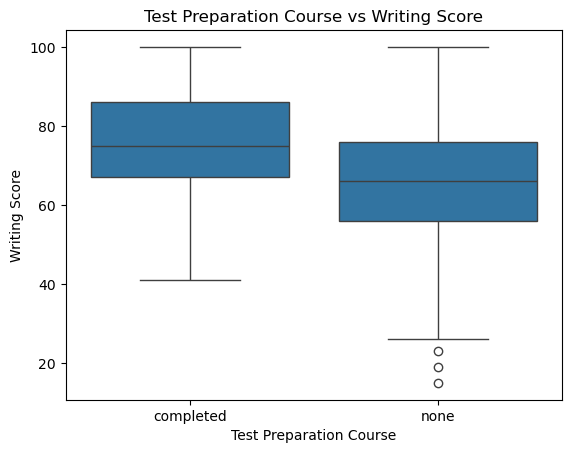

In [23]:
# Boxplot: Test Preparation Course vs Writing Score
sns.boxplot(x='Preparation_Course', y='Writing_Score', data=data)
plt.title('Test Preparation Course vs Writing Score')
plt.xlabel('Test Preparation Course')
plt.ylabel('Writing Score')
plt.show()

In [24]:
# Calculate mean scores for each test preparation group
mean_scores_by_prep = data.groupby('Preparation_Course')[['Math_Score', 'Reading_Score', 'Writing_Score']].mean()

# Display the results
print(mean_scores_by_prep)

                    Math_Score  Reading_Score  Writing_Score
Preparation_Course                                          
completed            70.334302      74.726744      75.808140
none                 66.486280      68.103659      65.643293


In [25]:
# Group scores by Race/Ethnicity and calculate summary statistics
race_analysis = data.groupby('Race_Ethnicity')[['Math_Score', 'Reading_Score', 'Writing_Score']].describe()

# Simplify multi-index column names for better readability
race_analysis.columns = [f"{stat}_{score}" for score, stat in race_analysis.columns]

# Transpose the table to make groups columns and statistics rows
race_transposed = race_analysis.T

# Reset index and rename columns
race_transposed.reset_index(inplace=True)
race_transposed.rename(columns={"index": "Statistic"}, inplace=True)

# Display the formatted output
print("Race/Ethnicity-Based Summary Statistics (Formatted):")
print("=" * 90)
print(race_transposed.to_string(index=False))

Race/Ethnicity-Based Summary Statistics (Formatted):
          Statistic   group A    group B    group C    group D    group E
   count_Math_Score 79.000000 198.000000 323.000000 257.000000 143.000000
    mean_Math_Score 65.696203  64.070707  65.510836  68.879377  77.426573
     std_Math_Score 12.480091  14.602866  14.585442  15.792510  13.911941
     min_Math_Score 34.000000  27.000000  20.000000  15.000000  41.000000
     25%_Math_Score 57.000000  54.250000  57.000000  59.000000  67.500000
     50%_Math_Score 65.000000  64.000000  66.000000  69.000000  80.000000
     75%_Math_Score 74.500000  75.000000  76.000000  81.000000  88.000000
     max_Math_Score 96.000000 100.000000  95.000000 100.000000 100.000000
count_Reading_Score 79.000000 198.000000 323.000000 257.000000 143.000000
 mean_Reading_Score 69.202532  68.530303  68.609907  70.929961  76.615385
  std_Reading_Score 12.688961  14.160307  13.697582  14.321195  13.636076
  min_Reading_Score 40.000000  34.000000  25.000000  33.000

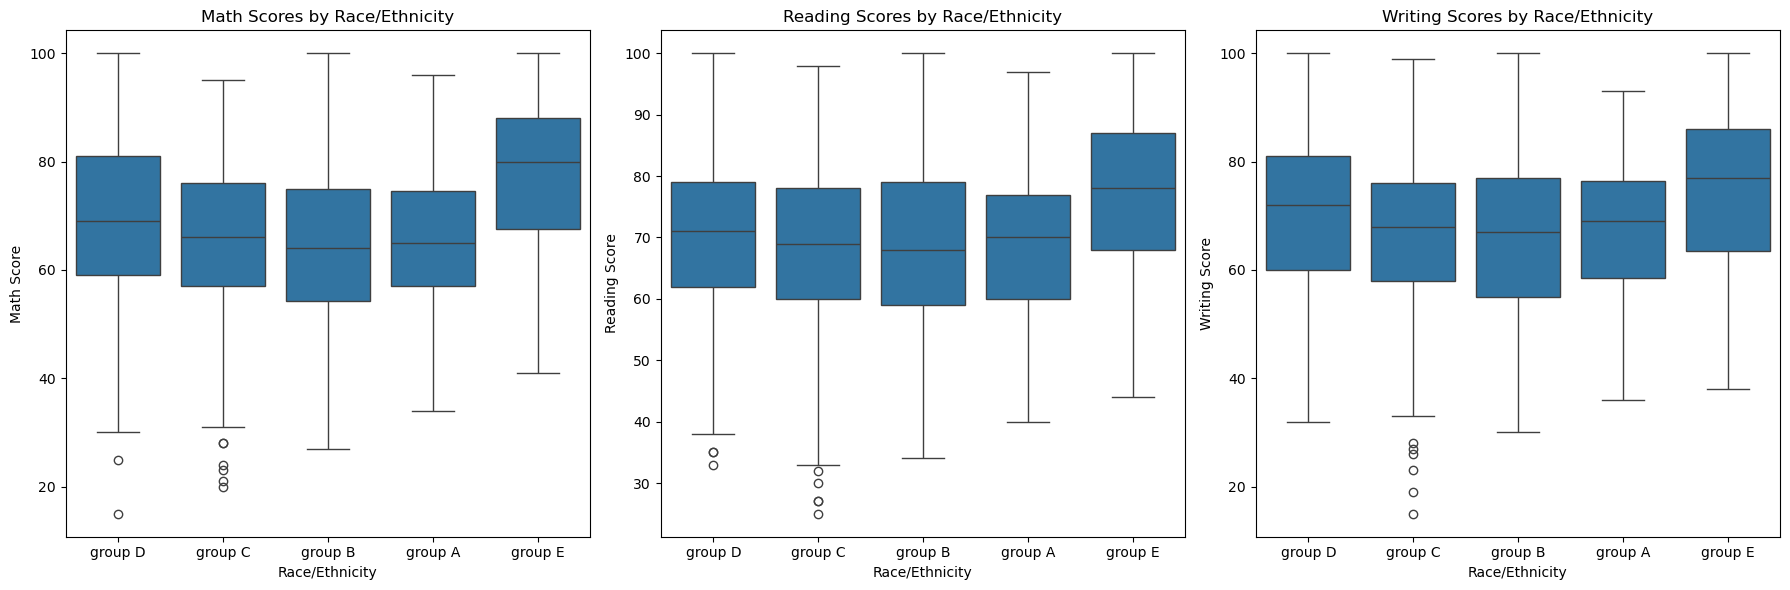

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Box plot for Math, Reading, and Writing scores across all groups
plt.figure(figsize=(18, 6))

# Box plot for Math Scores
plt.subplot(1, 3, 1)
sns.boxplot(data=data, x='Race_Ethnicity', y='Math_Score')
plt.title('Math Scores by Race/Ethnicity')
plt.xlabel('Race/Ethnicity')
plt.ylabel('Math Score')

# Box plot for Reading Scores
plt.subplot(1, 3, 2)
sns.boxplot(data=data, x='Race_Ethnicity', y='Reading_Score')
plt.title('Reading Scores by Race/Ethnicity')
plt.xlabel('Race/Ethnicity')
plt.ylabel('Reading Score')

# Box plot for Writing Scores
plt.subplot(1, 3, 3)
sns.boxplot(data=data, x='Race_Ethnicity', y='Writing_Score')
plt.title('Writing Scores by Race/Ethnicity')
plt.xlabel('Race/Ethnicity')
plt.ylabel('Writing Score')

# Display the plots
plt.tight_layout()
plt.show()

In [27]:
# Group scores by Parental Level of Education and calculate summary statistics
parent_analysis = data.groupby('Parental_Education')[['Math_Score', 'Reading_Score', 'Writing_Score']].describe()

# Simplify multi-index column names for better readability
parent_analysis.columns = [f"{stat}_{score}" for score, stat in parent_analysis.columns]

# Transpose the table to make groups columns and statistics rows
parent_transposed = parent_analysis.T

# Reset index and rename columns
parent_transposed.reset_index(inplace=True)
parent_transposed.rename(columns={"index": "Statistic"}, inplace=True)

# Display the formatted output
print("Parental Education-Based Summary Statistics (Formatted):")
print("=" * 90)
print(parent_transposed.to_string(index=False))

Parental Education-Based Summary Statistics (Formatted):
          Statistic  associate's degree  bachelor's degree  high school  master's degree  some college  some high school
   count_Math_Score          204.000000         105.000000   215.000000        75.000000    224.000000        177.000000
    mean_Math_Score           70.348039          69.866667    65.381395        71.026667     68.642857         64.197740
     std_Math_Score           14.821813          14.262017    15.971459        14.189807     14.552738         15.739730
     min_Math_Score           28.000000          39.000000    15.000000        32.000000     27.000000         23.000000
     25%_Math_Score           61.000000          61.000000    55.000000        62.000000     59.000000         54.000000
     50%_Math_Score           72.000000          68.000000    66.000000        70.000000     70.000000         64.000000
     75%_Math_Score           82.000000          81.000000    77.500000        82.000000     80.

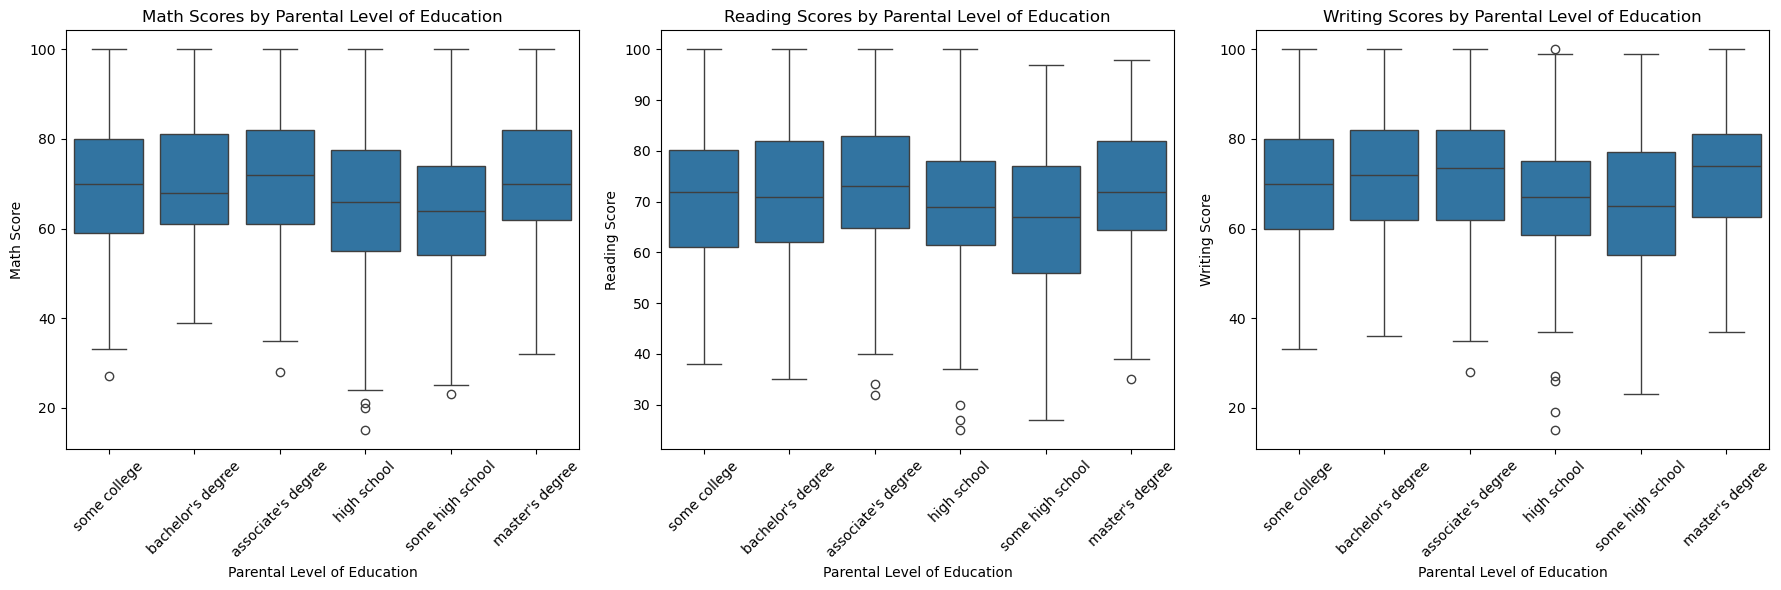

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Box plot for Math, Reading, and Writing scores across all parental education levels
plt.figure(figsize=(18, 6))

# Box plot for Math Scores
plt.subplot(1, 3, 1)
sns.boxplot(data=data, x='Parental_Education', y='Math_Score')
plt.title('Math Scores by Parental Level of Education')
plt.xlabel('Parental Level of Education')
plt.ylabel('Math Score')
plt.xticks(rotation=45)

# Box plot for Reading Scores
plt.subplot(1, 3, 2)
sns.boxplot(data=data, x='Parental_Education', y='Reading_Score')
plt.title('Reading Scores by Parental Level of Education')
plt.xlabel('Parental Level of Education')
plt.ylabel('Reading Score')
plt.xticks(rotation=45)

# Box plot for Writing Scores
plt.subplot(1, 3, 3)
sns.boxplot(data=data, x='Parental_Education', y='Writing_Score')
plt.title('Writing Scores by Parental Level of Education')
plt.xlabel('Parental Level of Education')
plt.ylabel('Writing Score')
plt.xticks(rotation=45)

# Display the plots
plt.tight_layout()
plt.show()

<h1>STEP3 Feature Engineering<h1>

In [29]:
# Perform one-hot encoding for categorical variables
data_encoded = pd.get_dummies(data, columns=['Gender', 'Lunch', 'Preparation_Course'], drop_first=True)

# Display the first few rows of the encoded dataset
print(data_encoded.head())

  Race_Ethnicity  Parental_Education  Math_Score  Reading_Score  \
0        group D        some college          59             70   
1        group C   bachelor's degree          57             69   
2        group D  associate's degree          65             71   
3        group D  associate's degree          67             71   
4        group D  associate's degree          99             85   

   Writing_Score  Gender_male  Lunch_standard  Preparation_Course_none  
0             78        False            True                    False  
1             77        False            True                    False  
2             74        False            True                    False  
3             76        False            True                    False  
4             88         True            True                    False  


In [30]:
from sklearn.preprocessing import StandardScaler

# Select numerical columns to standardize
columns_to_scale = ['Math_Score', 'Reading_Score', 'Writing_Score']

# Apply standardization
scaler = StandardScaler()
data_encoded[columns_to_scale] = scaler.fit_transform(data_encoded[columns_to_scale])

# Display the first few rows of the scaled dataset
print(data_encoded.head())

  Race_Ethnicity  Parental_Education  Math_Score  Reading_Score  \
0        group D        some college   -0.577987      -0.027092   
1        group C   bachelor's degree   -0.709198      -0.098012   
2        group D  associate's degree   -0.184352       0.043829   
3        group D  associate's degree   -0.053141       0.043829   
4        group D  associate's degree    2.046243       1.036711   

   Writing_Score  Gender_male  Lunch_standard  Preparation_Course_none  
0       0.589943        False            True                    False  
1       0.523358        False            True                    False  
2       0.323603        False            True                    False  
3       0.456773        False            True                    False  
4       1.255793         True            True                    False  


In [31]:
# Features and target for Math Score
X_math = data_encoded.drop(columns=['Math_Score'])
y_math = data_encoded['Math_Score']

# Split data for Math Score
from sklearn.model_selection import train_test_split
X_train_math, X_test_math, y_train_math, y_test_math = train_test_split(X_math, y_math, test_size=0.3, random_state=42)

# Display shapes
print(f"Math - Features shape: {X_train_math.shape}, Target shape: {y_train_math.shape}")

Math - Features shape: (700, 7), Target shape: (700,)


In [32]:
# Features and target for Reading Score
X_reading = data_encoded.drop(columns=['Reading_Score'])
y_reading = data_encoded['Reading_Score']

# Split data for Reading Score
X_train_reading, X_test_reading, y_train_reading, y_test_reading = train_test_split(X_reading, y_reading, test_size=0.3, random_state=42)

# Display shapes
print(f"Reading - Features shape: {X_train_reading.shape}, Target shape: {y_train_reading.shape}")

Reading - Features shape: (700, 7), Target shape: (700,)


In [33]:
# Features and target for Writing Score
X_writing = data_encoded.drop(columns=['Writing_Score'])
y_writing = data_encoded['Writing_Score']

# Split data for Writing Score
X_train_writing, X_test_writing, y_train_writing, y_test_writing = train_test_split(X_writing, y_writing, test_size=0.3, random_state=42)

# Display shapes
print(f"Writing - Features shape: {X_train_writing.shape}, Target shape: {y_train_writing.shape}")

Writing - Features shape: (700, 7), Target shape: (700,)


<h1>STEP4 Model Building<h1>

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [35]:
print(y_train_math.head())

541   -0.840410
440    0.930945
482    0.406100
422    0.930945
778   -0.315564
Name: Math_Score, dtype: float64


In [36]:
print(y_train_reading.head())

541   -1.019974
440    0.469350
482   -0.239852
422    0.965791
778   -0.807214
Name: Reading_Score, dtype: float64


In [37]:
print(y_train_writing.head())

541   -1.008097
440    0.190433
482   -0.142492
422    0.789698
778   -1.207852
Name: Writing_Score, dtype: float64


In [38]:
# Print the column names to identify the exact name of the problematic column
print(data.columns)

Index(['Gender', 'Race_Ethnicity', 'Parental_Education', 'Lunch',
       'Preparation_Course', 'Math_Score', 'Reading_Score', 'Writing_Score'],
      dtype='object')


In [39]:
# One-hot encode all categorical columns
data_encoded = pd.get_dummies(data, columns=['Gender', 'Lunch', 'Preparation_Course'], drop_first=True)

# Check the first few rows of the encoded dataset
print(data_encoded.head())

  Race_Ethnicity  Parental_Education  Math_Score  Reading_Score  \
0        group D        some college          59             70   
1        group C   bachelor's degree          57             69   
2        group D  associate's degree          65             71   
3        group D  associate's degree          67             71   
4        group D  associate's degree          99             85   

   Writing_Score  Gender_male  Lunch_standard  Preparation_Course_none  
0             78        False            True                    False  
1             77        False            True                    False  
2             74        False            True                    False  
3             76        False            True                    False  
4             88         True            True                    False  


In [40]:
# Check for columns with non-numeric data
print(data_encoded.dtypes)

Race_Ethnicity             object
Parental_Education         object
Math_Score                  int64
Reading_Score               int64
Writing_Score               int64
Gender_male                  bool
Lunch_standard               bool
Preparation_Course_none      bool
dtype: object


In [41]:
# One-hot encode all categorical columns
data_encoded = pd.get_dummies(data, drop_first=True)


In [42]:
# Import necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Assuming `data_encoded` is your pre-processed DataFrame after one-hot encoding and scaling

# Define features and target for all subjects
X = data_encoded.drop(columns=['Math_Score', 'Reading_Score', 'Writing_Score'])
y_math = data_encoded['Math_Score']
y_reading = data_encoded['Reading_Score']
y_writing = data_encoded['Writing_Score']

# Split the data into training and testing sets for each subject
X_train, X_test, y_train_math, y_test_math = train_test_split(X, y_math, test_size=0.3, random_state=42)
_, _, y_train_reading, y_test_reading = train_test_split(X, y_reading, test_size=0.3, random_state=42)
_, _, y_train_writing, y_test_writing = train_test_split(X, y_writing, test_size=0.3, random_state=42)

# Initialize the scaler and scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Scale based on training data
X_test_scaled = scaler.transform(X_test)  # Apply same transformation to test data

# Initialize models
model_math = LinearRegression()
model_reading = LinearRegression()
model_writing = LinearRegression()

# Train the models
model_math.fit(X_train_scaled, y_train_math)
model_reading.fit(X_train_scaled, y_train_reading)
model_writing.fit(X_train_scaled, y_train_writing)

# Predict on the test data
y_pred_math = model_math.predict(X_test_scaled)
y_pred_reading = model_reading.predict(X_test_scaled)
y_pred_writing = model_writing.predict(X_test_scaled)

# Evaluate the models
print("Math Score Prediction:")
print(f"R² Score: {r2_score(y_test_math, y_pred_math):.4f}")
print(f"Mean Squared Error: {mean_squared_error(y_test_math, y_pred_math):.4f}")

print("\nReading Score Prediction:")
print(f"R² Score: {r2_score(y_test_reading, y_pred_reading):.4f}")
print(f"Mean Squared Error: {mean_squared_error(y_test_reading, y_pred_reading):.4f}")

print("\nWriting Score Prediction:")
print(f"R² Score: {r2_score(y_test_writing, y_pred_writing):.4f}")
print(f"Mean Squared Error: {mean_squared_error(y_test_writing, y_pred_writing):.4f}")

# Example of predicting with new data
new_data = pd.DataFrame({
    'Gender_male': [1],  # Replace with the actual value for gender (1 for male, 0 for female)
    'Lunch_standard': [1],  # Replace with actual value for lunch type (1 for standard, 0 for free/reduced)
    'Preparation_Course_completed': [1],  # Replace with the actual value for preparation course (1 for completed, 0 for not completed)
    
    # Add other features you have after one-hot encoding
    'Race_Ethnicity_group_D': [0],  # Example for one-hot encoded feature, replace with actual values
    'Race_Ethnicity_group_C': [1]   # Replace with actual value for the race/ethnicity column (if applicable)
})

# Ensure the new data has the same structure and columns as the training data
new_data = new_data.reindex(columns=X_train.columns, fill_value=0)

# Scale the new data using the fitted scaler
new_data_scaled = scaler.transform(new_data)

# Predict using the trained models
predicted_math = model_math.predict(new_data_scaled)
predicted_reading = model_reading.predict(new_data_scaled)
predicted_writing = model_writing.predict(new_data_scaled)

# Display predictions
print(f"\nPredicted Math Score: {predicted_math[0]:.2f}")
print(f"Predicted Reading Score: {predicted_reading[0]:.2f}")
print(f"Predicted Writing Score: {predicted_writing[0]:.2f}")

Math Score Prediction:
R² Score: 0.2529
Mean Squared Error: 166.5611

Reading Score Prediction:
R² Score: 0.1642
Mean Squared Error: 163.7934

Writing Score Prediction:
R² Score: 0.2487
Mean Squared Error: 168.4722

Predicted Math Score: 78.80
Predicted Reading Score: 75.44
Predicted Writing Score: 75.20


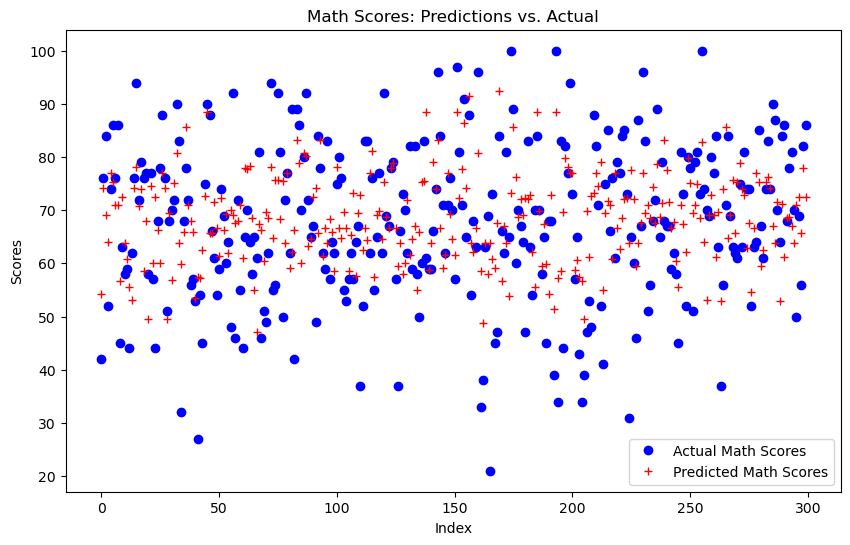

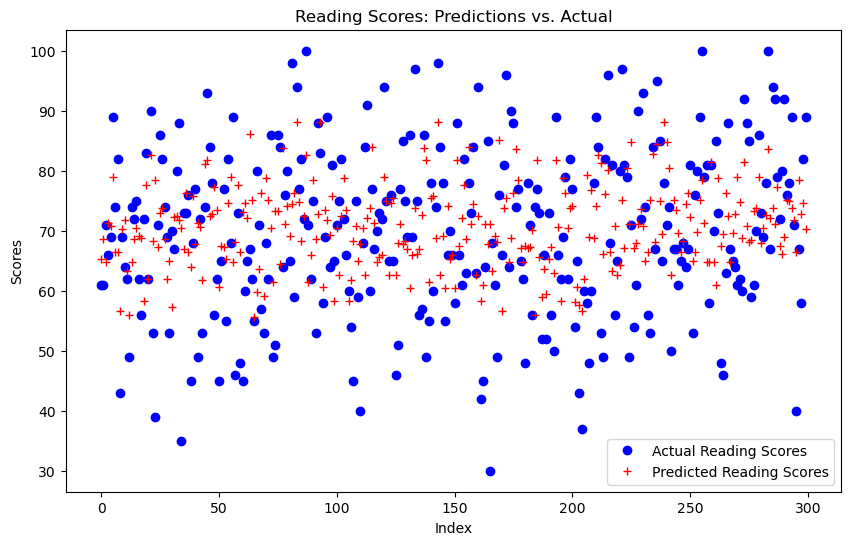

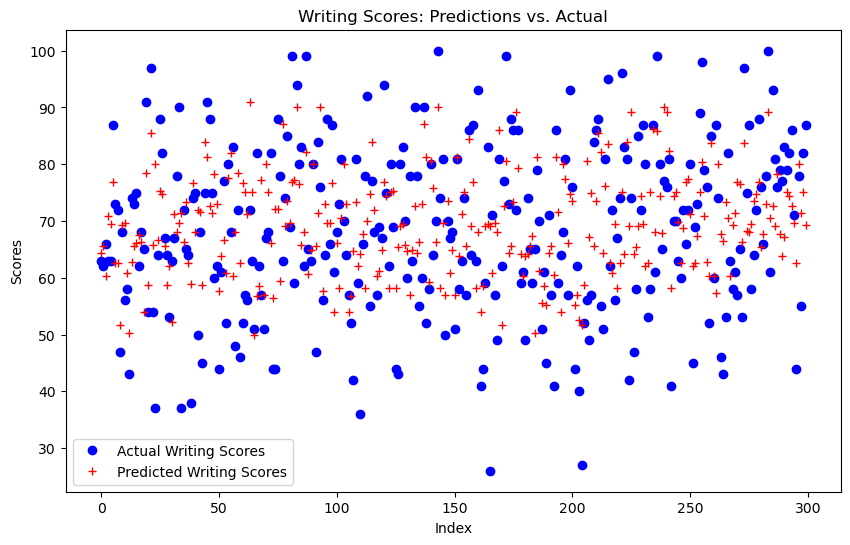

In [43]:
import matplotlib.pyplot as plt
import numpy as np

# Plot Predictions vs. Actual Values as Dot Plots

# Math Score Dot Plot
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(y_test_math)), y_test_math, 'bo', label='Actual Math Scores')  # Blue dots for actual values
plt.plot(np.arange(len(y_pred_math)), y_pred_math, 'r+', label='Predicted Math Scores')  # Red plus for predicted values
plt.title('Math Scores: Predictions vs. Actual')
plt.xlabel('Index')
plt.ylabel('Scores')
plt.legend()
plt.show()

# Reading Score Dot Plot
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(y_test_reading)), y_test_reading, 'bo', label='Actual Reading Scores')  # Blue dots for actual values
plt.plot(np.arange(len(y_pred_reading)), y_pred_reading, 'r+', label='Predicted Reading Scores')  # Red plus for predicted values
plt.title('Reading Scores: Predictions vs. Actual')
plt.xlabel('Index')
plt.ylabel('Scores')
plt.legend()
plt.show()

# Writing Score Dot Plot
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(y_test_writing)), y_test_writing, 'bo', label='Actual Writing Scores')  # Blue dots for actual values
plt.plot(np.arange(len(y_pred_writing)), y_pred_writing, 'r+', label='Predicted Writing Scores')  # Red plus for predicted values
plt.title('Writing Scores: Predictions vs. Actual')
plt.xlabel('Index')
plt.ylabel('Scores')
plt.legend()
plt.show()

In [44]:
# Import necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Assuming `data_encoded` is your pre-processed DataFrame after one-hot encoding and scaling

# Define features and target for all subjects
X = data_encoded.drop(columns=['Math_Score', 'Reading_Score', 'Writing_Score'])
y_math = data_encoded['Math_Score']
y_reading = data_encoded['Reading_Score']
y_writing = data_encoded['Writing_Score']

# Split the data into training and testing sets for each subject
X_train, X_test, y_train_math, y_test_math = train_test_split(X, y_math, test_size=0.3, random_state=42)
_, _, y_train_reading, y_test_reading = train_test_split(X, y_reading, test_size=0.3, random_state=42)
_, _, y_train_writing, y_test_writing = train_test_split(X, y_writing, test_size=0.3, random_state=42)

# Initialize the scaler and scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Scale based on training data
X_test_scaled = scaler.transform(X_test)  # Apply same transformation to test data

# Initialize Random Forest models
model_math = RandomForestRegressor(n_estimators=100, random_state=42)
model_reading = RandomForestRegressor(n_estimators=100, random_state=42)
model_writing = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the models
model_math.fit(X_train_scaled, y_train_math)
model_reading.fit(X_train_scaled, y_train_reading)
model_writing.fit(X_train_scaled, y_train_writing)

# Predict on the test data
y_pred_math = model_math.predict(X_test_scaled)
y_pred_reading = model_reading.predict(X_test_scaled)
y_pred_writing = model_writing.predict(X_test_scaled)

# Evaluate the models
print("Math Score Prediction (Random Forest):")
print(f"R² Score: {r2_score(y_test_math, y_pred_math):.4f}")
print(f"Mean Squared Error: {mean_squared_error(y_test_math, y_pred_math):.4f}")

print("\nReading Score Prediction (Random Forest):")
print(f"R² Score: {r2_score(y_test_reading, y_pred_reading):.4f}")
print(f"Mean Squared Error: {mean_squared_error(y_test_reading, y_pred_reading):.4f}")

print("\nWriting Score Prediction (Random Forest):")
print(f"R² Score: {r2_score(y_test_writing, y_pred_writing):.4f}")
print(f"Mean Squared Error: {mean_squared_error(y_test_writing, y_pred_writing):.4f}")

# Example of predicting with new data
new_data = pd.DataFrame({
    'Gender_male': [1],  # Replace with the actual value for gender (1 for male, 0 for female)
    'Lunch_standard': [1],  # Replace with actual value for lunch type (1 for standard, 0 for free/reduced)
    'Preparation_Course_completed': [1],  # Replace with the actual value for preparation course (1 for completed, 0 for not completed)
    
    # Add other features you have after one-hot encoding
    'Race_Ethnicity_group_D': [0],  # Example for one-hot encoded feature, replace with actual values
    'Race_Ethnicity_group_C': [1]   # Replace with actual value for the race/ethnicity column (if applicable)
})

# Ensure the new data has the same structure and columns as the training data
new_data = new_data.reindex(columns=X_train.columns, fill_value=0)

# Scale the new data using the fitted scaler
new_data_scaled = scaler.transform(new_data)

# Predict using the trained Random Forest models
predicted_math = model_math.predict(new_data_scaled)
predicted_reading = model_reading.predict(new_data_scaled)
predicted_writing = model_writing.predict(new_data_scaled)

# Display predictions
print(f"\nPredicted Math Score (Random Forest): {predicted_math[0]:.2f}")
print(f"Predicted Reading Score (Random Forest): {predicted_reading[0]:.2f}")
print(f"Predicted Writing Score (Random Forest): {predicted_writing[0]:.2f}")

Math Score Prediction (Random Forest):
R² Score: 0.0975
Mean Squared Error: 201.2249

Reading Score Prediction (Random Forest):
R² Score: 0.0171
Mean Squared Error: 192.6228

Writing Score Prediction (Random Forest):
R² Score: 0.1139
Mean Squared Error: 198.6884

Predicted Math Score (Random Forest): 78.10
Predicted Reading Score (Random Forest): 73.06
Predicted Writing Score (Random Forest): 74.02


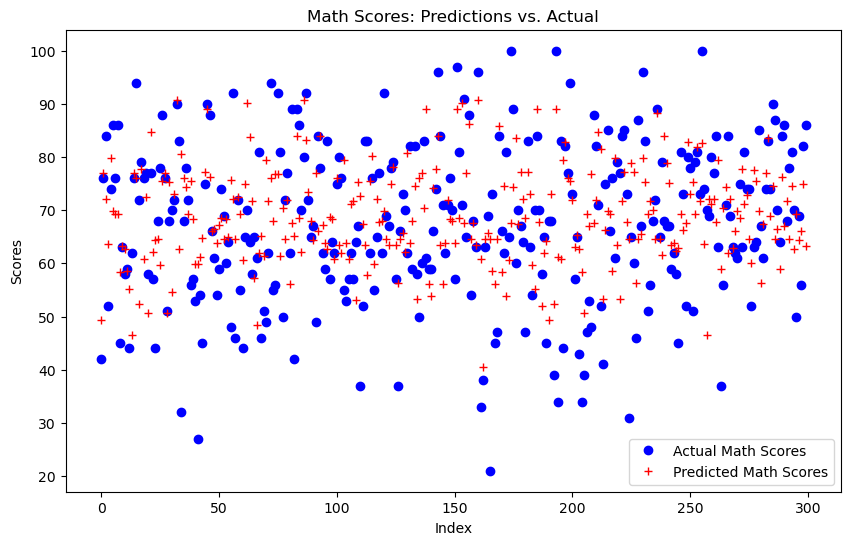

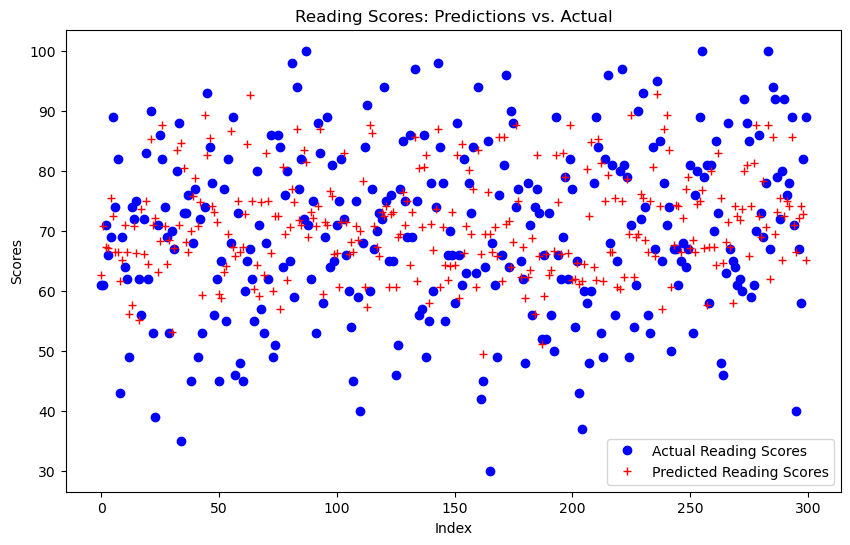

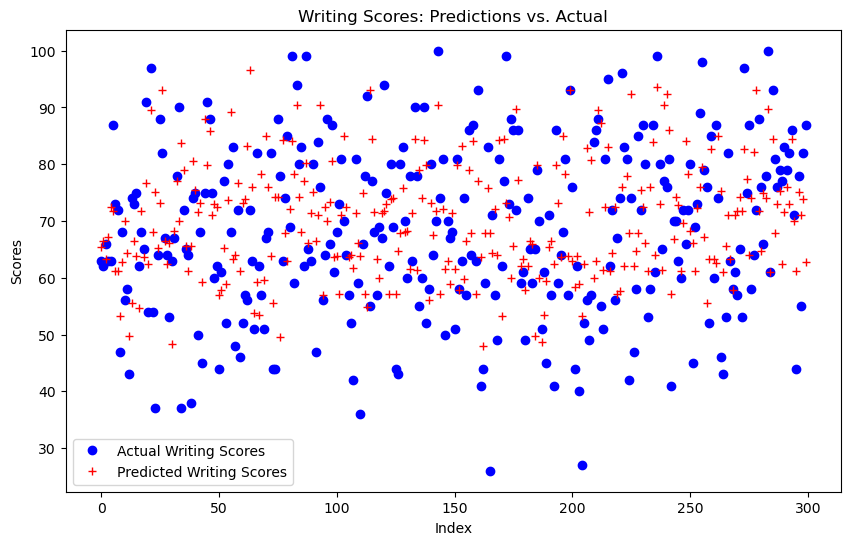

In [45]:
import matplotlib.pyplot as plt
import numpy as np

# Plot Predictions vs. Actual Values as Dot Plots

# Math Score Dot Plot
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(y_test_math)), y_test_math, 'bo', label='Actual Math Scores')  # Blue dots for actual values
plt.plot(np.arange(len(y_pred_math)), y_pred_math, 'r+', label='Predicted Math Scores')  # Red plus for predicted values
plt.title('Math Scores: Predictions vs. Actual')
plt.xlabel('Index')
plt.ylabel('Scores')
plt.legend()
plt.show()

# Reading Score Dot Plot
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(y_test_reading)), y_test_reading, 'bo', label='Actual Reading Scores')  # Blue dots for actual values
plt.plot(np.arange(len(y_pred_reading)), y_pred_reading, 'r+', label='Predicted Reading Scores')  # Red plus for predicted values
plt.title('Reading Scores: Predictions vs. Actual')
plt.xlabel('Index')
plt.ylabel('Scores')
plt.legend()
plt.show()

# Writing Score Dot Plot
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(y_test_writing)), y_test_writing, 'bo', label='Actual Writing Scores')  # Blue dots for actual values
plt.plot(np.arange(len(y_pred_writing)), y_pred_writing, 'r+', label='Predicted Writing Scores')  # Red plus for predicted values
plt.title('Writing Scores: Predictions vs. Actual')
plt.xlabel('Index')
plt.ylabel('Scores')
plt.legend()
plt.show()

In [46]:
# Import necessary libraries
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Assuming `data_encoded` is your pre-processed DataFrame after one-hot encoding

# Define features and target for all subjects
X = data_encoded.drop(columns=['Math_Score', 'Reading_Score', 'Writing_Score'])
y_math = data_encoded['Math_Score']
y_reading = data_encoded['Reading_Score']
y_writing = data_encoded['Writing_Score']

# Split the data into training and testing sets for each subject
X_train, X_test, y_train_math, y_test_math = train_test_split(X, y_math, test_size=0.3, random_state=42)
_, _, y_train_reading, y_test_reading = train_test_split(X, y_reading, test_size=0.3, random_state=42)
_, _, y_train_writing, y_test_writing = train_test_split(X, y_writing, test_size=0.3, random_state=42)

# Initialize the scaler and scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Scale based on training data
X_test_scaled = scaler.transform(X_test)  # Apply same transformation to test data

# Initialize SVR models
model_math = SVR(kernel='rbf')  # Radial Basis Function kernel for non-linear regression
model_reading = SVR(kernel='rbf')
model_writing = SVR(kernel='rbf')

# Train the models
model_math.fit(X_train_scaled, y_train_math)
model_reading.fit(X_train_scaled, y_train_reading)
model_writing.fit(X_train_scaled, y_train_writing)

# Predict on the test data
y_pred_math = model_math.predict(X_test_scaled)
y_pred_reading = model_reading.predict(X_test_scaled)
y_pred_writing = model_writing.predict(X_test_scaled)

# Evaluate the models
print("Math Score Prediction (SVR):")
print(f"R² Score: {r2_score(y_test_math, y_pred_math):.4f}")
print(f"Mean Squared Error: {mean_squared_error(y_test_math, y_pred_math):.4f}")

print("\nReading Score Prediction (SVR):")
print(f"R² Score: {r2_score(y_test_reading, y_pred_reading):.4f}")
print(f"Mean Squared Error: {mean_squared_error(y_test_reading, y_pred_reading):.4f}")

print("\nWriting Score Prediction (SVR):")
print(f"R² Score: {r2_score(y_test_writing, y_pred_writing):.4f}")
print(f"Mean Squared Error: {mean_squared_error(y_test_writing, y_pred_writing):.4f}")

# Example of predicting with new data
new_data = pd.DataFrame({
    'Gender_male': [1],  # Replace with actual value for gender (1 for male, 0 for female)
    'Lunch_standard': [1],  # Replace with actual value for lunch type
    'Preparation_Course_completed': [1],  # Replace with actual value for preparation course
    
    # Add other features you have after one-hot encoding
    'Race_Ethnicity_group_D': [0],  # Example for one-hot encoded feature, replace with actual values
    'Race_Ethnicity_group_C': [1]   # Replace with actual value for the race/ethnicity column (if applicable)
})

# Ensure the new data has the same structure and columns as the training data
new_data = new_data.reindex(columns=X_train.columns, fill_value=0)

# Scale the new data using the fitted scaler
new_data_scaled = scaler.transform(new_data)

# Predict using the trained SVR models
predicted_math = model_math.predict(new_data_scaled)
predicted_reading = model_reading.predict(new_data_scaled)
predicted_writing = model_writing.predict(new_data_scaled)

# Display predictions
print(f"\nPredicted Math Score (SVR): {predicted_math[0]:.2f}")
print(f"Predicted Reading Score (SVR): {predicted_reading[0]:.2f}")
print(f"Predicted Writing Score (SVR): {predicted_writing[0]:.2f}")

Math Score Prediction (SVR):
R² Score: 0.1968
Mean Squared Error: 179.0729

Reading Score Prediction (SVR):
R² Score: 0.1450
Mean Squared Error: 167.5422

Writing Score Prediction (SVR):
R² Score: 0.2008
Mean Squared Error: 179.2056

Predicted Math Score (SVR): 76.68
Predicted Reading Score (SVR): 74.23
Predicted Writing Score (SVR): 74.10


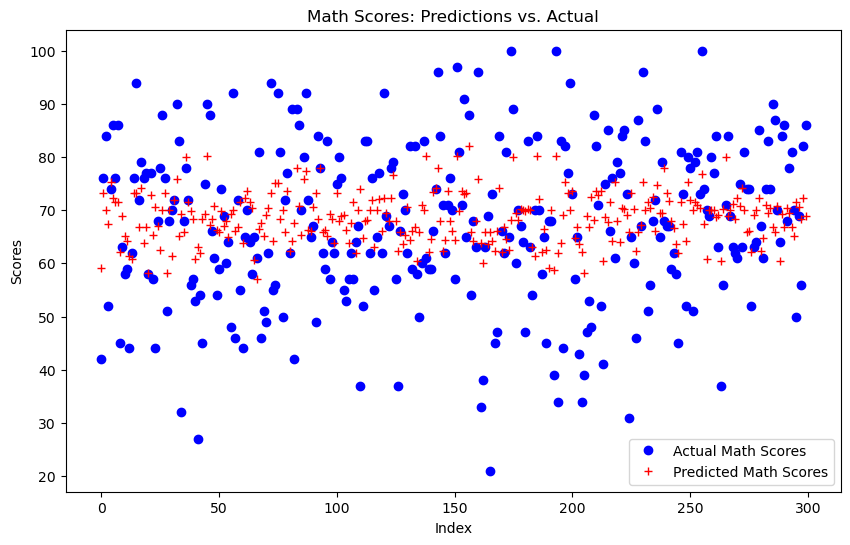

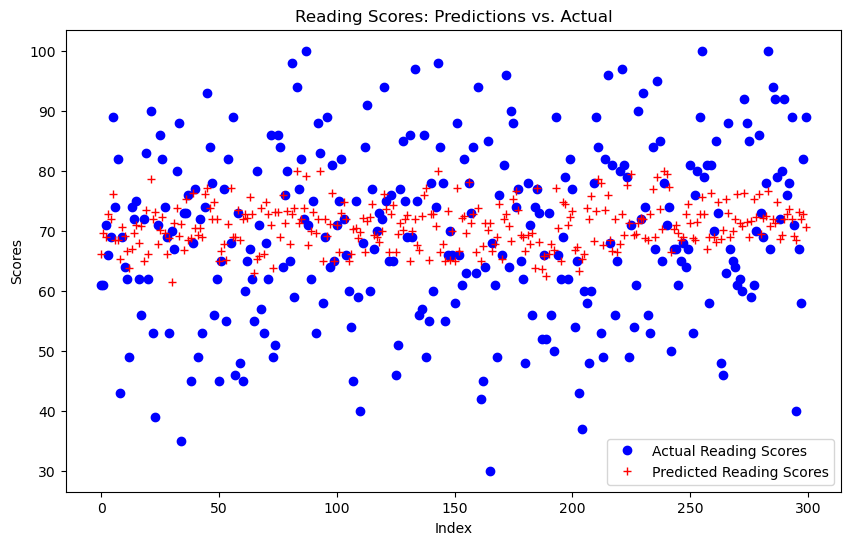

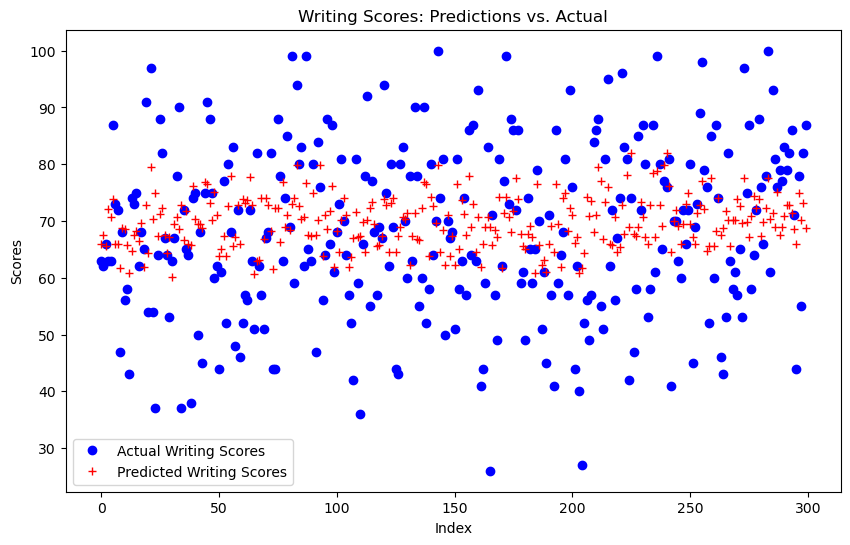

In [47]:
import matplotlib.pyplot as plt
import numpy as np

# Plot Predictions vs. Actual Values as Dot Plots

# Math Score Dot Plot
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(y_test_math)), y_test_math, 'bo', label='Actual Math Scores')  # Blue dots for actual values
plt.plot(np.arange(len(y_pred_math)), y_pred_math, 'r+', label='Predicted Math Scores')  # Red plus for predicted values
plt.title('Math Scores: Predictions vs. Actual')
plt.xlabel('Index')
plt.ylabel('Scores')
plt.legend()
plt.show()

# Reading Score Dot Plot
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(y_test_reading)), y_test_reading, 'bo', label='Actual Reading Scores')  # Blue dots for actual values
plt.plot(np.arange(len(y_pred_reading)), y_pred_reading, 'r+', label='Predicted Reading Scores')  # Red plus for predicted values
plt.title('Reading Scores: Predictions vs. Actual')
plt.xlabel('Index')
plt.ylabel('Scores')
plt.legend()
plt.show()

# Writing Score Dot Plot
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(y_test_writing)), y_test_writing, 'bo', label='Actual Writing Scores')  # Blue dots for actual values
plt.plot(np.arange(len(y_pred_writing)), y_pred_writing, 'r+', label='Predicted Writing Scores')  # Red plus for predicted values
plt.title('Writing Scores: Predictions vs. Actual')
plt.xlabel('Index')
plt.ylabel('Scores')
plt.legend()
plt.show()